In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

This tutorial assumes that you already have a set of matrices...

In [2]:
top_dir = Path("./")
data_dir = top_dir/"fc_data/"

In [3]:
!ls

README.md                        fc_data
__pycache__                      shen268_coords.csv
cpm.py                           unrelated_subIDs_n338.txt
cpm_tutorial.ipynb               unrestricted_behav_data_n338.csv
cpm_wrapper.py


In [4]:
subj_list = pd.read_csv('unrelated_subIDs_n338.txt', header=None)
subj_list = np.array(subj_list, dtype=str).flatten()

Let's read in one subject's matrix and make sure it looks reasonable:

In [5]:
all_behav_data = pd.read_csv('unrestricted_behav_data_n338.csv', dtype={'Subject': str})
all_behav_data.set_index('Subject', inplace=True)
print(all_behav_data.shape)
all_behav_data.head()

(338, 581)


,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
Subject,,,,,,,,,,,,,,,,,,,,,
100206,S900,Q11,M,26-30,True,1,1,4,100,True,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
100610,S900,Q08,M,26-30,True,2,1,4,100,True,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
101006,S500,Q06,F,31-35,True,2,2,4,100,True,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80
101309,S500,Q06,M,26-30,True,1,1,4,100,True,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
101915,Q3,Q04,F,31-35,True,2,2,4,100,True,...,4.4,96.87,77.61,0.0,38.6,112.11,111.70,1.84,1.0,1.80


In [6]:
def read_in_matrices(subj_list, file_suffix=None, data_dir=data_dir, zscore=False):
    """
    """
    
    all_fc_data = {}
            
    for subj in subj_list:
        # try to find this subject's matrix
        if file_suffix:
            file = [f for f in os.listdir(data_dir) if subj in f and file_suffix in f]
        else:
            file = [f for f in os.listdir(data_dir) if subj in f]
            
        # make sure there is one and only one file    
        if len(file) ==0:
            raise ValueError("No data found for subject {}".format(subj))
        if len(file) >1:
            raise ValueError("More than one matrix found for subject {}! Specify a suffix?".format(subj))
        
        # read it in and make sure it's symmetric and has reasonable dimensions
        tmp = np.loadtxt(data_dir / file[0])
        assert tmp.shape[0]==tmp.shape[1]>1, "Matrix seems to have incorrect dimensions: {}".format(tmp.shape)
        
        # take just the upper triangle and store it in a dictionary
        if ~zscore:
            all_fc_data[subj] = tmp[np.triu_indices_from(tmp, k=1)]
        if zscore:
            all_fc_data[subj] = sp.stats.zscore(tmp[np.triu_indices_from(tmp, k=1)])
        
    # Convert dictionary into dataframe
    all_fc_data = pd.DataFrame.from_dict(all_fc_data, orient='index')
    
    return all_fc_data

In [7]:
all_fc_data = read_in_matrices(subj_list, file_suffix='REST')

In [8]:
all_fc_data.head()

,0,1,2,3,4,5,6,7,8,9,...,35768,35769,35770,35771,35772,35773,35774,35775,35776,35777
100206,-0.0126,0.32330,0.07675,-0.00935,0.07315,-0.03645,0.03920,-0.05085,0.11115,-0.10385,...,0.07700,-0.05335,-0.05960,0.07340,-0.07035,-0.02345,0.11240,0.08575,-0.00065,-0.04875
100610,0.0264,0.13705,0.03880,-0.00515,0.12650,0.27320,0.23310,0.16515,0.15775,0.03840,...,0.00200,0.08050,0.04145,0.06880,0.00990,0.09700,0.02340,0.09375,0.20835,0.09985
101006,-0.0329,-0.02075,-0.01470,0.08315,0.17685,0.17075,0.03220,0.02115,0.17490,0.12475,...,0.07970,-0.00350,-0.25130,-0.13555,-0.07430,-0.05355,-0.08735,0.07910,-0.01705,0.06920
101309,0.0710,0.11620,0.00425,0.03905,0.20200,0.20185,0.31185,0.11320,0.11270,0.19250,...,-0.01435,0.01745,0.01105,0.03210,0.05005,0.02760,-0.04655,0.05080,0.02065,-0.00720
101915,0.0832,0.27890,0.12290,-0.00755,0.09600,0.09895,0.21355,-0.22720,0.17240,-0.08715,...,0.06410,-0.04185,0.18670,0.09770,0.28130,0.13695,0.01230,-0.07145,0.06930,0.09660


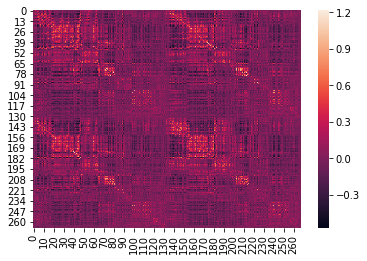

In [9]:
sns.heatmap(sp.spatial.distance.squareform(all_fc_data.iloc[0,:]))

In [10]:
def mk_kfold_indices(subj_list, k = 10):
    """
    Splits list of subjects into k folds
    """
    n_subs = len(subj_list)
    n_subs_per_fold = n_subs//k # floor integer for n_subs_per_fold

    indices = [[fold_no]*n_subs_per_fold for fold_no in range(k)] # generate repmat list of indices
    remainder = n_subs % k # figure out how many subs are leftn over
    remainder_inds = list(range(remainder))
    indices = [item for sublist in indices for item in sublist]    
    [indices.append(ind) for ind in remainder_inds] # add indices for remainder subs

    assert len(indices)==n_subs, "Length of indices list does not equal number of subjects, something went wrong"

    np.random.shuffle(indices) # shuffles in place

    return np.array(indices)

In [11]:
def split_train_test(subj_list, indices, test_fold):
    """
    For a subj list, k-fold indices, and given fold, returns lists of train_subs and test_subs
    """

    train_inds = np.where(indices!=test_fold)
    test_inds = np.where(indices==test_fold)

    train_subs = []
    for sub in subj_list[train_inds]:
        train_subs.append(sub)

    test_subs = []
    for sub in subj_list[test_inds]:
        test_subs.append(sub)

    return (train_subs, test_subs)

In [12]:
def get_train_test_data(all_fc_data, train_subs, test_subs, behav_data, behav):

    """
    Extracts requested FC and behavioral data for a list of train_subs and test_subs
    """

    train_vcts = all_fc_data.loc[train_subs, :]
    test_vcts = all_fc_data.loc[test_subs, :]

    train_behav = behav_data.loc[train_subs, behav]

    return (train_vcts, train_behav, test_vcts)

In [13]:
def select_features(train_vcts, train_behav, r_thresh=0.2, corr_type='pearson'):

    assert train_vcts.index.equals(train_behav.index), "Row indices of FC vcts and behavior don't match!"

    # Correlate all edges with behav vector
    if corr_type =='pearson':
        cov = np.dot(train_behav.T - train_behav.mean(), train_vcts - train_vcts.mean(axis=0)) / (train_behav.shape[0]-1)
        corr = cov / np.sqrt(np.var(train_behav, ddof=1) * np.var(train_vcts, axis=0, ddof=1))
    elif corr_type =='spearman':
        corr = []
        for edge in train_vcts.columns:
            r_val = sp.stats.spearmanr(train_vcts.loc[:,edge], train_behav)[0]
            corr.append(r_val)

    # Define positive and negative masks
    mask_dict = {}
    mask_dict["pos"] = corr > r_thresh
    mask_dict["neg"] = corr < -r_thresh
    
    # print("Found {} edges positively correlated with behavior in the training set".format(mask_dict["pos"].sum())) # for debugging
    # print("Found {} edges negatively correlated with behavior in the training set".format(mask_dict["neg"].sum())) # for debugging

    return mask_dict

In [14]:
def build_model(train_vcts, mask_dict, train_behav):

    assert train_vcts.index.equals(train_behav.index), "Row indices of FC vcts and behavior don't match!"

    model_dict = {}

    # Loop through pos and neg tails
    X_glm = np.zeros((train_vcts.shape[0], len(mask_dict.items())))

    t = 0
    for tail, mask in mask_dict.items():
        X = train_vcts.values[:, mask].sum(axis=1)
        X_glm[:, t] = X
        y = train_behav
        (slope, intercept) = np.polyfit(X, y, 1)
        model_dict[tail] = (slope, intercept)
        t+=1

    X_glm = np.c_[X_glm, np.ones(X_glm.shape[0])]
    model_dict["glm"] = tuple(np.linalg.lstsq(X_glm, y, rcond=None)[0])

    return model_dict

In [15]:
def apply_model(test_vcts, mask_dict, model_dict):

    behav_pred = {}

    X_glm = np.zeros((test_vcts.shape[0], len(mask_dict.items())))

    # Loop through pos and neg tails
    t = 0
    for tail, mask in mask_dict.items():
        X = test_vcts.loc[:, mask].sum(axis=1)
        X_glm[:, t] = X

        slope, intercept = model_dict[tail]
        behav_pred[tail] = slope*X + intercept
        t+=1

    X_glm = np.c_[X_glm, np.ones(X_glm.shape[0])]
    behav_pred["glm"] = np.dot(X_glm, model_dict["glm"])

    return behav_pred

In [16]:
def cpm_wrapper(all_fc_data, all_behav_data, behav, k=10, **cpm_kwargs):

    assert all_fc_data.index.equals(all_behav_data.index), "Row (subject) indices of FC vcts and behavior don't match!"

    subj_list = all_fc_data.index # get subj_list from df index
    
    indices = mk_kfold_indices(subj_list, k=k)
    
    # Initialize df for storing observed and predicted behavior
    col_list = []
    for tail in ["pos", "neg", "glm"]:
        col_list.append(behav + " predicted (" + tail + ")")
    col_list.append(behav + " observed")
    behav_obs_pred = pd.DataFrame(index=subj_list, columns = col_list)
    
    # Initialize array for storing feature masks
    n_edges = all_fc_data.shape[1]
    all_masks = {}
    all_masks["pos"] = np.zeros((k, n_edges))
    all_masks["neg"] = np.zeros((k, n_edges))
    
    for fold in range(k):
        print("doing fold {}".format(fold))
        train_subs, test_subs = split_train_test(subj_list, indices, test_fold=fold)
        train_vcts, train_behav, test_vcts = get_train_test_data(all_fc_data, train_subs, test_subs, all_behav_data, behav=behav)
        mask_dict = select_features(train_vcts, train_behav, **cpm_kwargs)
        all_masks["pos"][fold,:] = mask_dict["pos"]
        all_masks["neg"][fold,:] = mask_dict["neg"]
        model_dict = build_model(train_vcts, mask_dict, train_behav)
        behav_pred = apply_model(test_vcts, mask_dict, model_dict)
        for tail, predictions in behav_pred.items():
            behav_obs_pred.loc[test_subs, behav + " predicted (" + tail + ")"] = predictions
            
    behav_obs_pred.loc[subj_list, behav + " observed"] = all_behav_data[behav]
    
    return behav_obs_pred, all_masks

In [30]:
all_fc_data = read_in_matrices(subj_list, file_suffix='WM')

In [31]:
cpm_kwargs = {'r_thresh': 0.2, 'corr_type': 'pearson'}
behav = "PMAT24_A_CR"

behav_obs_pred, all_masks = cpm_wrapper(all_fc_data, all_behav_data, behav=behav, **cpm_kwargs)

doing fold 0
Found 228 edges positively correlated with behavior in the training set
Found 179 edges negatively correlated with behavior in the training set
doing fold 1
Found 264 edges positively correlated with behavior in the training set
Found 261 edges negatively correlated with behavior in the training set
doing fold 2
Found 246 edges positively correlated with behavior in the training set
Found 222 edges negatively correlated with behavior in the training set
doing fold 3
Found 234 edges positively correlated with behavior in the training set
Found 196 edges negatively correlated with behavior in the training set
doing fold 4
Found 226 edges positively correlated with behavior in the training set
Found 217 edges negatively correlated with behavior in the training set
doing fold 5
Found 259 edges positively correlated with behavior in the training set
Found 195 edges negatively correlated with behavior in the training set
doing fold 6
Found 209 edges positively correlated with be

In [32]:
behav_obs_pred.head()

,PMAT24_A_CR predicted (pos),PMAT24_A_CR predicted (neg),PMAT24_A_CR predicted (glm),PMAT24_A_CR observed
100206,20.414,19.1869,19.3658,20
100610,19.1645,17.9952,18.0196,23
101006,15.3172,15.9736,15.9913,11
101309,13.9797,13.144,13.1415,15
101915,15.2924,13.8085,13.9511,21


In [33]:
def plot_predictions(behav_obs_pred, tail="glm"):
    x = behav_obs_pred.filter(regex=("obs")).astype(float)
    y = behav_obs_pred.filter(regex=(tail)).astype(float)

    g = sns.regplot(x=x.T.squeeze(), y=y.T.squeeze(), color='black')
    ax_min = min(min(g.get_xlim()), min(g.get_ylim()))
    ax_max = max(max(g.get_xlim()), max(g.get_ylim()))
    g.set_xlim(ax_min, ax_max)
    g.set_ylim(ax_min, ax_max)
    g.set_aspect('equal', adjustable='box')
    
    r = sp.stats.pearsonr(x,y)[0][0]
    g.annotate('r = {0:.2f}'.format(r), xy = (0.7, 0.1), xycoords = 'axes fraction')
    
    return g

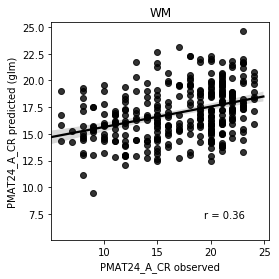

In [34]:
g = plot_predictions(behav_obs_pred)
g.set_title("WM")
plt.show()

## Visualize edges

In [35]:
shen268_coords = pd.read_csv("shen268_coords.csv", index_col="NodeNo")
shen268_coords.shape

(268, 3)

In [23]:
from nilearn.plotting import plot_connectome

/Users/finnes/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [27]:
def plot_consistent_edges(all_masks, tail, thresh = 1., color='gray'):
    
    edge_frac = (all_masks[tail].sum(axis=0))/(all_masks[tail].shape[0])
    print("For the {} tail, {} edges were selected in at least {}% of k-fold iterations".format(tail, (edge_frac>=thresh).sum(), thresh*100))
    edge_frac_square = sp.spatial.distance.squareform(edge_frac)

    node_mask = np.amax(edge_frac_square, axis=0) >= thresh # find nodes that have at least one edge that passes the threshold
    node_size = edge_frac_square.sum(axis=0)*node_mask*20 # size nodes based on how many suprathreshold edges they have

    plot_connectome(adjacency_matrix=edge_frac_square, edge_threshold=thresh,
                    node_color = color,
                    node_coords=shen268_coords, node_size=node_size,
                    display_mode= 'lzry',
                    edge_kwargs={"linewidth": 1, 'color': color})

For the pos tail, 28 edges were selected in at least 100.0% of k-fold iterations


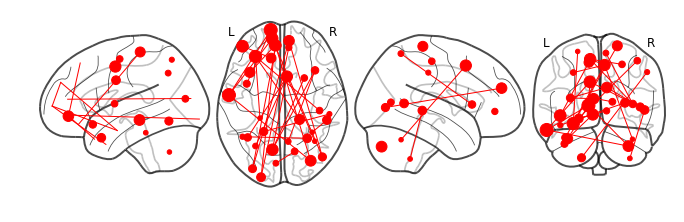

In [28]:
plot_consistent_edges(all_masks, "pos", color = 'red')

For the neg tail, 22 edges were selected in at least 100.0% of k-fold iterations


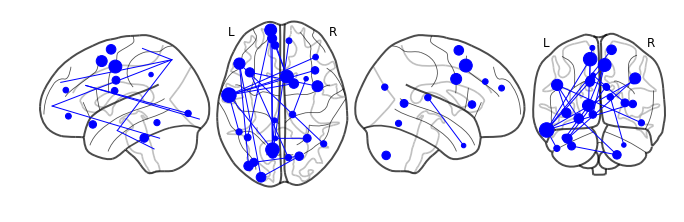

In [29]:
plot_consistent_edges(all_masks, "neg", color = 'blue')